In [1]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('extended_activities.csv')
print(df.head())


Saving extended_activities.csv to extended_activities.csv
   Activity ID          Activity Date Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07    Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01  Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29  Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17    Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08    Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97             139               11    False   
1          4852     29.65             133               12    False   
2          5817     32.38             139               19    False   
3          3851     21.68             140               11    False   
4          5843     32.36             131               14    False   

  Activity Gear  ... Maximum Power 10s  Maximum Power 30s  \
0           NaN  ...             412.9 

**Extraction of running data:**

In [3]:
# Filter the data for running activities
running_data = df[df['Activity Type'] == 'Run']
#df = df1[df1['Activity Type'] == 'Run']

# Display the first few rows of the filtered data to verify
print(running_data.head())
#print(df.head())

    Activity ID          Activity Date Activity Name Activity Type  \
89   7057073739  28 Apr 2022, 21:49:44   Morning Run           Run   
90   7067754767   1 May 2022, 00:11:03   Morning Run           Run   
91   7073448977   1 May 2022, 23:04:26   Morning Run           Run   
92   7083686840   3 May 2022, 20:34:15   Morning Run           Run   
93   7094718079   5 May 2022, 21:44:27   Morning Run           Run   

    Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
89          4127     12.77             178               78    False   
90          7723     24.63             173              185    False   
91          4202     12.51             182              255    False   
92          4086     12.72             188              276    False   
93          4290     13.09             184              241    False   

   Activity Gear  ... Maximum Power 10s  Maximum Power 30s  \
89           NaN  ...             296.8              271.9   
90           NaN  ... 

**Data Cleaning:**

In [4]:
# Check the dimensions of the running data
print(running_data.shape)

# Check data types and missing values
print(running_data.info())


(164, 49)
<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                164 non-null    int64  
 1   Activity Date              164 non-null    object 
 2   Activity Name              164 non-null    object 
 3   Activity Type              164 non-null    object 
 4   Elapsed Time               164 non-null    int64  
 5   Distance                   164 non-null    float64
 6   Max Heart Rate             164 non-null    int64  
 7   Relative Effort            164 non-null    int64  
 8   Commute                    164 non-null    bool   
 9   Activity Gear              0 non-null      object 
 10  Filename                   164 non-null    object 
 11  Athlete Weight             0 non-null      float64
 12  Bike Weight                0 non-null      float64
 13  Moving Time                164 non-null    i

In [5]:
# Check for missing values
missing_values = running_data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Activity ID                    0
Activity Date                  0
Activity Name                  0
Activity Type                  0
Elapsed Time                   0
Distance                       0
Max Heart Rate                 0
Relative Effort                0
Commute                        0
Activity Gear                164
Filename                       0
Athlete Weight               164
Bike Weight                  164
Moving Time                    0
Max Speed                      0
Average Speed                  0
Elevation Gain                 0
Elevation Loss                 1
Elevation Low                  1
Elevation High                 1
Max Grade                      0
Average Grade                  0
Max Cadence                    0
Average Cadence                0
Average Heart Rate             0
Average Watts                  0
Calories                       0
Average Temperature          155
Total Work                   147
Perceived Exertion         

**Handling Missing values:**

In [6]:
# Drop columns with a significant number of missing values and "Total Steps" column
running_data_cleaned = running_data.drop(columns=['Activity Gear', 'Athlete Weight', 'Bike Weight', 'Average Temperature', 'Total Work', 'Perceived Exertion', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Total Steps'])

# Impute missing values for remaining columns
median_values = running_data_cleaned[['Elevation Loss', 'Elevation Low', 'Elevation High', 'Grade Adjusted Distance']].median()
running_data_cleaned.fillna(median_values, inplace=True)

# Verify if missing values have been handled
print(running_data_cleaned.isnull().sum())


Activity ID                0
Activity Date              0
Activity Name              0
Activity Type              0
Elapsed Time               0
Distance                   0
Max Heart Rate             0
Relative Effort            0
Commute                    0
Filename                   0
Moving Time                0
Max Speed                  0
Average Speed              0
Elevation Gain             0
Elevation Loss             0
Elevation Low              0
Elevation High             0
Max Grade                  0
Average Grade              0
Max Cadence                0
Average Cadence            0
Average Heart Rate         0
Average Watts              0
Calories                   0
Weighted Average Power     0
Power Count                0
Grade Adjusted Distance    0
Average Elapsed Speed      0
Dirt Distance              0
Maximum Power 5s           0
Maximum Power 10s          0
Maximum Power 30s          0
Maximum Power 1.0min       0
Maximum Power 5.0min       0
Maximum Power 

**Exploratory Data Analysis**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = running_data_cleaned.describe()
print(summary_stats)



        Activity ID  Elapsed Time    Distance  Max Heart Rate  \
count  1.640000e+02    164.000000  164.000000      164.000000   
mean   8.211358e+09   4390.871951   12.584268      178.237805   
std    7.392044e+08   2052.552196    5.369254       10.528875   
min    7.057074e+09   1506.000000    4.060000      140.000000   
25%    7.759300e+09   3015.500000    8.475000      174.750000   
50%    8.146922e+09   4016.500000   12.000000      178.000000   
75%    8.611014e+09   5236.250000   15.362500      184.000000   
max    1.027158e+10  16615.000000   28.870000      210.000000   

       Relative Effort  Moving Time   Max Speed  Average Speed  \
count       164.000000   164.000000  164.000000     164.000000   
mean        152.810976  4211.518293    6.247638       2.981124   
std         106.591449  1771.775123    6.017020       0.135569   
min           6.000000  1506.000000    3.233984       2.696547   
25%          68.750000  2987.750000    3.994507       2.895473   
50%         130.50

**Correlation Analysis of running data:**

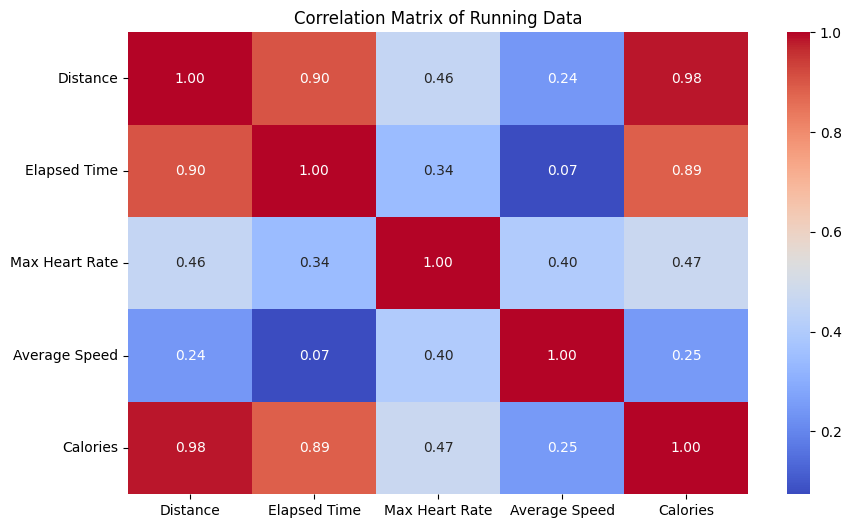

In [8]:
# Correlation Analysis
corr_variables = ['Distance', 'Elapsed Time', 'Max Heart Rate', 'Average Speed', 'Calories']
corr_matrix = running_data[corr_variables].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Running Data")
plt.show()



*   Distance and Calories (Correlation = 0.983): There's a highly significant positive correlation between the distance covered during runs and the calories burned. This relationship suggests that as the distance increases, the body expends more energy, resulting in a greater calorie burn.

*   Max Heart Rate and Average Speed (Correlation = 0.403): There's a moderate positive correlation between the maximum heart rate and average speed. This suggests that runs with higher average speeds tend to be associated with higher maximum heart rates, indicating increased cardiovascular demand during faster-paced runs.

*  Calories and Elapsed Time (Correlation = 0.887): Similarly, there's a strong positive correlation between the calories burned and the elapsed time of the run. This association indicates that longer-duration runs result in a higher energy expenditure.

*   Distance and Max Heart Rate (Correlation = 0.456): A moderate positive correlation is observed between the distance covered and the maximum heart rate reached during the run. This suggests that longer runs may involve periods of elevated heart rate, although this relationship is not as pronounced as with distance and calories or elapsed time.

*   Distance and Elapsed Time (Correlation = 0.903): A strong positive correlation exists between the distance covered and the time taken to complete the run. This correlation is intuitive, as longer distances naturally require more time to complete.

*   Average Speed and Other Metrics: The correlations between average speed and other metrics like distance (0.243), calories (0.248), and elapsed time (0.074) are relatively low. This indicates that while average speed is an important metric, it's not strongly linked to the distance covered, calories burned, or duration of the run. Average speed may be influenced by various factors not captured in these metrics, such as terrain, weather conditions, or individual fitness levels.

In summary, the analysis reveals several notable relationships within the dataset. The most significant associations are observed between the distance of runs and both the calories burned and the elapsed time. These correlations imply that longer runs result in higher calorie expenditure and longer durations. However, the average speed exhibits weaker correlations with other metrics, indicating that it may be influenced by various factors not captured in these measurements.


<ipython-input-13-c1ced3be85e4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=running_data_cleaned, x='Distance', y='Average Heart Rate', palette="colorblind")
<ipython-input-13-c1ced3be85e4>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=running_data_cleaned, x='Elevation Gain', y='Average Heart Rate', palette="colorblind")


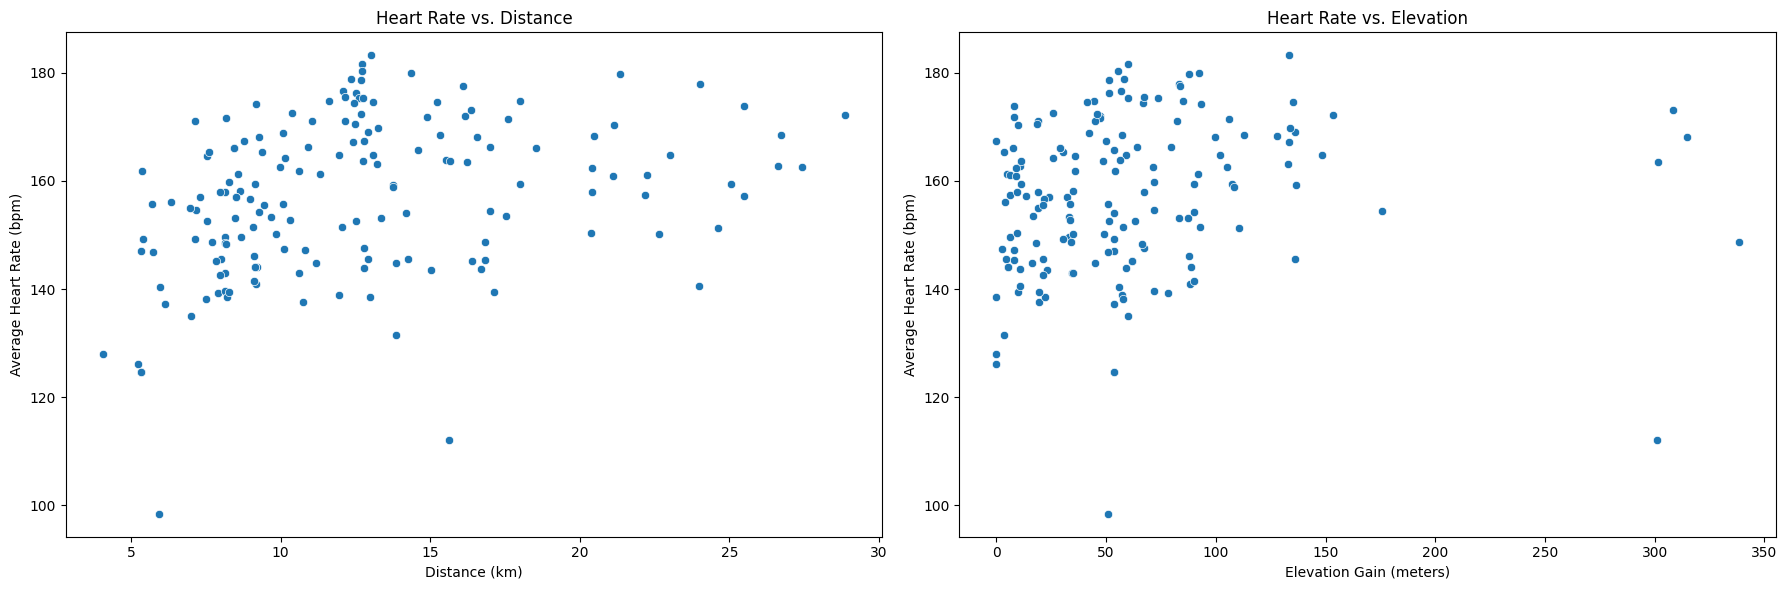

In [13]:
plt.figure(figsize=(18, 6))

# Distance vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(data=running_data_cleaned, x='Distance', y='Average Heart Rate', palette="colorblind")
plt.title('Heart Rate vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average Heart Rate (bpm)')

# Elevation vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(data=running_data_cleaned, x='Elevation Gain', y='Average Heart Rate', palette="colorblind")
plt.title('Heart Rate vs. Elevation')
plt.xlabel('Elevation Gain (meters)')
plt.ylabel('Average Heart Rate (bpm)')

plt.tight_layout()
plt.show()


**Heart Rate vs. Distance:**

*  Trend Observation: The scatter plot shows the relationship between the distance covered during a run and the average heart rate maintained during that run.
*  Insight: Generally, as the distance increases, there is a trend of higher average heart rates. This suggests that longer runs tend to require higher cardiovascular exertion, which is reflected in elevated heart rates.
*  Interpretation: Runners may observe their heart rates during different distances to understand their cardiovascular response to varying intensities and durations of exercise. This insight can help in planning training programs and setting performance goals.

**Heart Rate vs. Elevation Gain:**

*  Trend Observation: This scatter plot illustrates the relationship between the elevation gain (i.e., the total uphill climb during a run) and the average heart rate.

*  Insight: The plot indicates whether there is any correlation between running on hilly terrain (high elevation gain) and the average heart rate maintained during the run.
*  Interpretation: A higher elevation gain might suggest more challenging terrain, requiring increased cardiovascular effort to maintain pace. Observing how heart rate varies with elevation gain can help runners gauge the intensity of their workouts and adapt their training to different terrain types.

In summary, these scatter plots provide insights into how heart rate correlates with both distance covered and elevation gain during running activities. Understanding these relationships can aid runners in optimizing their training regimens and improving their performance.


 **Box plot visualization for Calories by Month**

<ipython-input-16-95743e57afd0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Calories', data=running_data_cleaned, palette='Set2')


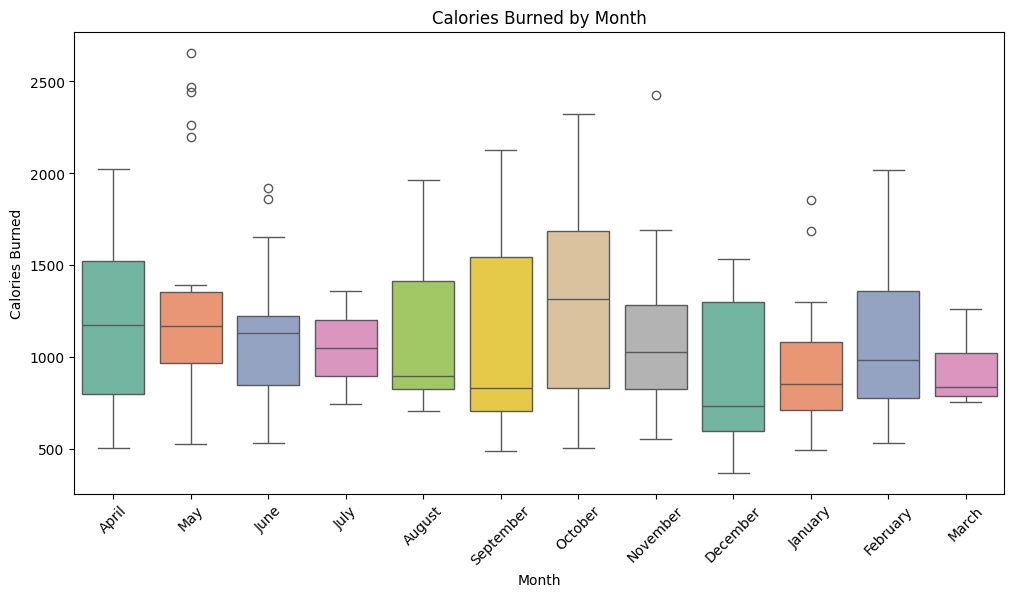

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting month-wise data
running_data_cleaned['Month'] = pd.to_datetime(running_data_cleaned['Activity Date']).dt.month_name()

# Box plot for Calories by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Calories', data=running_data_cleaned, palette='Set2')
plt.title('Calories Burned by Month')
plt.xlabel('Month')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()


Calories Burned by Month:

*  This box plot visualizes the distribution of calories burned during running activities across different months.
*  By categorizing the data into month-wise subsets, the plot helps examine whether there are variations in calorie expenditure based on the time of year.
*  Understanding how calorie burn varies by month can provide insights into seasonal patterns or trends in physical activity levels.
*  The box plot allows for comparison of central tendency, variability, and potential outliers in calorie expenditure across different months, enabling the identification of any significant patterns or differences.
